## Facial Landmark Detection

![Dlib 68 Points Model](data/images/opcv4face-w3-m1-68pointModel-small.png)

# Applications of Landmark Detection


## Frontalization for improved face recognition
![](data/images/frontalization.jpg)


## Head pose estimation

![Head Pose Estimation Example](data/images/opcv4face-w3-m1-headPoseEstimation.png)

## Face Morphing

![Face Morphing Example](data/images/opcv4face-w3-m1-faceMorph.png)

## Face Averaging

![Face Averaging Example](data/images/opcv4face0w3-m1-faceAverage-small.png)

# Facial Landmark Detection in Dlib

Landmark detection is a two step process.

1. **Face detection** : 30 - 60 FPS

2. **Landmark detection** : 1000 FPS

## Step 1: Import required modules

In [19]:
import dlib
import cv2
import numpy as np
from utils import imshow

## Step 2: Load dlib's face detector

In [20]:
faceDetector = dlib.get_frontal_face_detector()


## Step 3: Load Landmark Detector

In [21]:
landmarkDetector = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

## Step 4: Read Input Image

In [22]:
im = cv2.imread("data/images/woman.jpg")

![Input Image](data/images/woman-small.jpg)

## Step 5: Detect faces

Number of faces detected:  1


<Figure size 1080x1080 with 0 Axes>

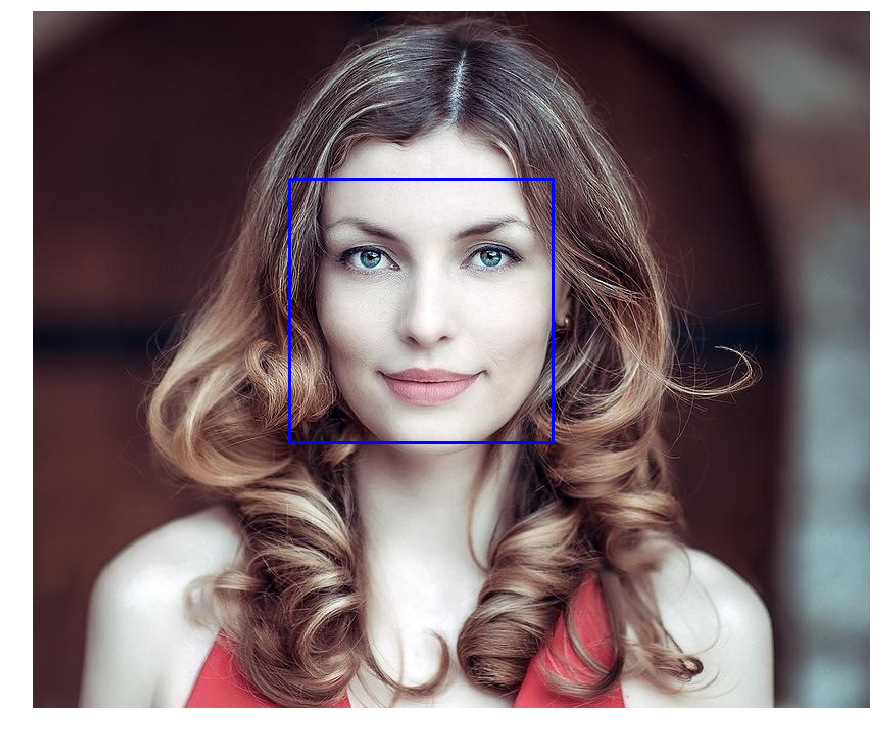

In [23]:
# Detect faces in the image
faceRects = faceDetector(im, 0)
print("Number of faces detected: ",len(faceRects))

# List to store landmarks of all detected faces
landmarksAll = []

import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
imDisplay = im.copy()
for r in faceRects:
    cv2.rectangle(imDisplay, (r.left(), r.top()), (r.right(), r.bottom()), (255, 0, 0), 2)

imshow(imDisplay)    

## Step 6: Render face points


The output landmarks are stored in an instance of the class **`full_object_detection`**.

A few important methods of `full_object_detection` are listed below

- `num_parts()` : Number of landmark points.
- `part(i)` : The ith landmark point
- `part(i).x()` and `part(i).y()` can be used to access the x and y coordinates of the ith landmark point.


In [24]:
def drawLandmarks(im, landmarks):
  for i, part in enumerate(landmarks.parts()):
    px = int(part.x)
    py = int(part.y)
    cv2.circle(im, (px, py), 1, (0, 0, 255), thickness=2, lineType=cv2.LINE_AA)
    cv2.putText(im, str(i), (px, py), cv2.FONT_HERSHEY_SIMPLEX, .3, (255, 0, 0), 1)

## Step 7: Perform landmark detection for each face


Dlib’s landmark detector needs two inputs:

- Input image.
- Face rectangle


In [25]:
# Loop over all detected face rectangles
for f in faceRects:
  newRect = dlib.rectangle(int(f.left()),int(f.top()), int(f.right()),int(f.bottom()))

  # For every face rectangle, run landmarkDetector
  landmarks = landmarkDetector(im, newRect)
  
  # Print number of landmarks
  print("Number of landmarks",len(landmarks.parts()))

  # Store landmarks for current face
  landmarksAll.append(landmarks)
  # Draw landmarks on face
  drawLandmarks(im, landmarks)

Number of landmarks 68


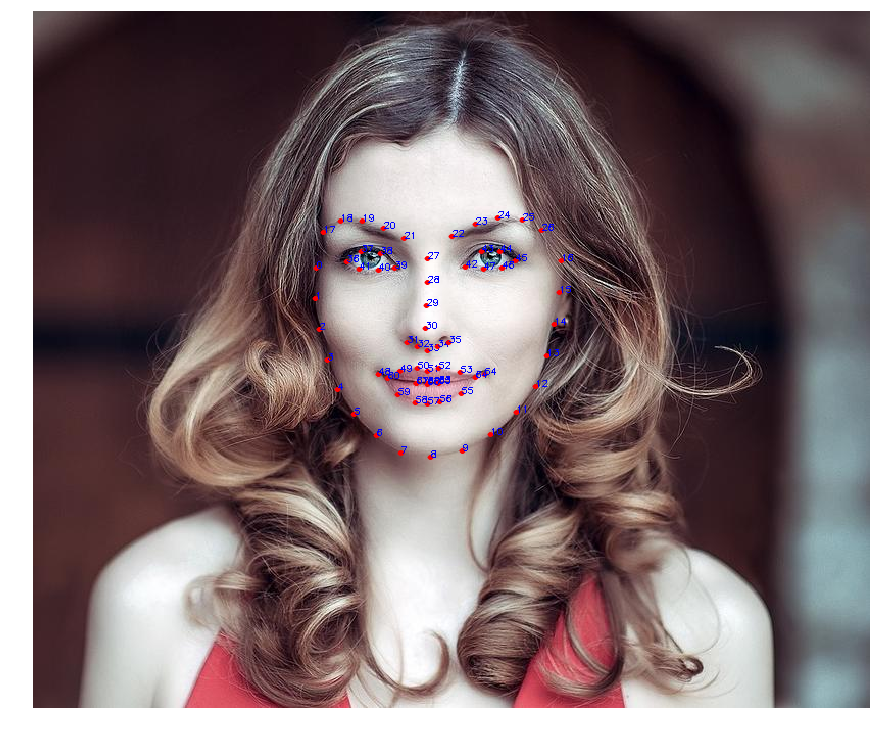

In [26]:
imshow(im)


# Thank You!